<a href="https://colab.research.google.com/github/alexpopov25/alexpopov25/blob/test-tasks/risk_level_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание №2**

*Задача*: создать прогностическую модель рисков беременных.  

*Метрика*: выбрать самостоятельно  

*Особенности*: в последних ячейках необходимо вывести метрики и матрицу ошибок на трейне и тесте.  


*Описание данных:*  

Age – возраст женщины  

SystolicBP, DiastolicBP – систолическое и диастолическое давление  

BS – уровень глюкозы в крови (mmol/L)  

BodyTemp – температура тела  

HeartRate – пульс  

RiskLevel – целевая переменная (низкий, средний, высокий риск)  

**План исследования:**  
1. Загрузка и исследование данных.
2. Предобработка данных.
3. Разделение на обучающую и тестовую выборки.
4. Обучение модели классификации
5. Оценка качества: метрики и матрица ошибок
6. Визуализация важности признаков
7. Вывод результатов на трейне и тесте


**Загрузка и исследование данных**

In [ ]:
# Загрузка библиотек и метрик
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Импорт для визуализаций
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE

In [ ]:
# Загрузка данных

url = 'https://drive.google.com/file/d/1--FeiK0Yo4GARky8s3OjujnXgOeicO1V/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, sep=',', on_bad_lines='skip')

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Выполняем обзор файла и информацию о нём.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Пропусков и явных аномалий в данных не обнаружено.

**Предобработка данных**

In [ ]:
df['RiskLevel'] = df['RiskLevel'].astype('string')
df['RiskLevel'].value_counts(dropna=False, ascending=True)

,count
RiskLevel,
high risk,272
mid risk,336
low risk,406


<Axes: >

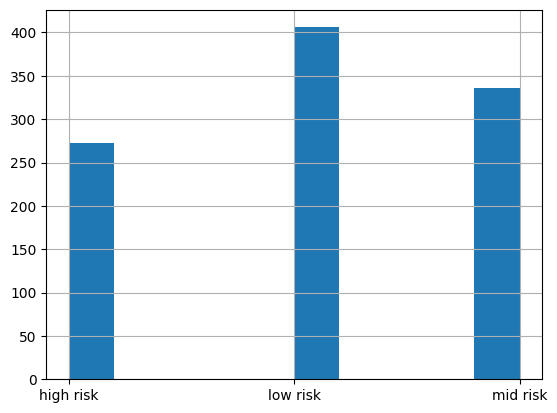

In [ ]:
df['RiskLevel'].hist() # Смотрим на баланс уровней риска

Целевая переменная относительно сбалансирована, перекосов в данных нет. Далее кодируем переменную, разделяем выборку на обучающую и тестовую, создаём и тестируем модель, строим визуализацию матрицы.

**Обучение модели**


--- Train ---
Accuracy: 0.9359
F1 Score (Weighted): 0.9359
Confusion Matrix:
[[220   1   4]
 [  4 300  22]
 [  9  12 239]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.94      0.98      0.96       225
    low risk       0.96      0.92      0.94       326
    mid risk       0.90      0.92      0.91       260

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.94       811
weighted avg       0.94      0.94      0.94       811



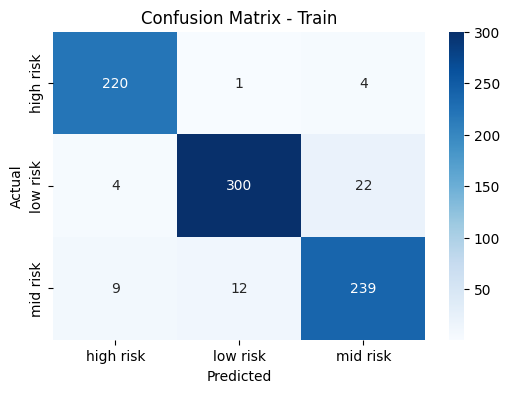


--- Test ---
Accuracy: 0.8128
F1 Score (Weighted): 0.8134
Confusion Matrix:
[[40  1  6]
 [ 3 61 16]
 [ 3  9 64]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.76      0.81        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



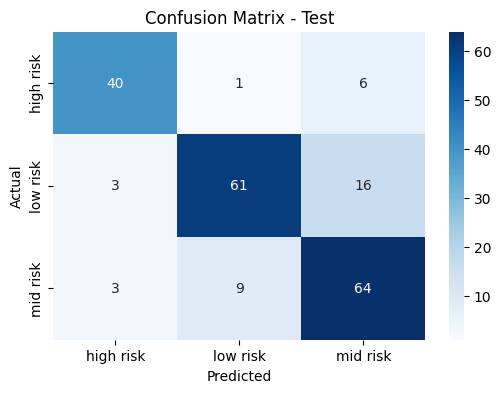

In [ ]:
# Кодируем целевую переменную
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

# Разделение признаков и целевой переменной
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисление метрик
def evaluate_model(y_true, y_pred, set_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n--- {set_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

    # Визуализация матрицы ошибок
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {set_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Оценка на train и test
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

**Предварительные выводы:**  

для high risk:  

Хорошие метрики, особенно precision = 0.87 — модель редко ошибочно помечает пациентов как высокий риск.  

для low risk:  

Высокая точность, но recall = 0.76 — модель иногда пропускает настоящих "низких рисков".  

для mid risk:  

Лучший recall (0.84), но низкая точность (0.74) — много ложных срабатываний.

Однако, если мы говорим о прогнозировании рисков беременности, то recall по high risk может быть критически важным — важно не пропустить реальный риск - в медицинских задачах одна из самых важных метрик.
Поэтому, сбалансируем уровни риска до одинакового уровня, проверим результаты.

**Обновлённый код с балансировкой**


--- Train ---
Accuracy: 0.9359
F1 Score (Weighted): 0.9359
Confusion Matrix:
[[220   1   4]
 [  4 298  24]
 [  9  10 241]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.94      0.98      0.96       225
    low risk       0.96      0.91      0.94       326
    mid risk       0.90      0.93      0.91       260

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.94       811
weighted avg       0.94      0.94      0.94       811



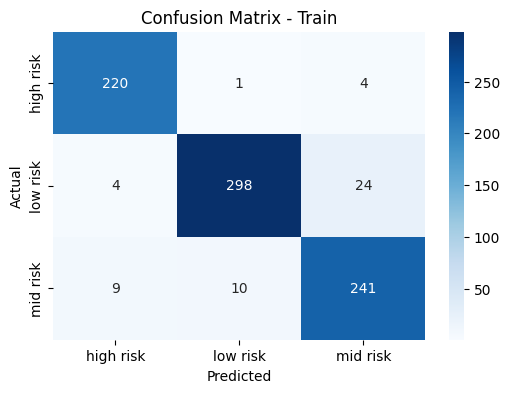


--- Test ---
Accuracy: 0.8128
F1 Score (Weighted): 0.8128
Confusion Matrix:
[[41  1  5]
 [ 4 60 16]
 [ 3  9 64]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.85      0.87      0.86        47
    low risk       0.86      0.75      0.80        80
    mid risk       0.75      0.84      0.80        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



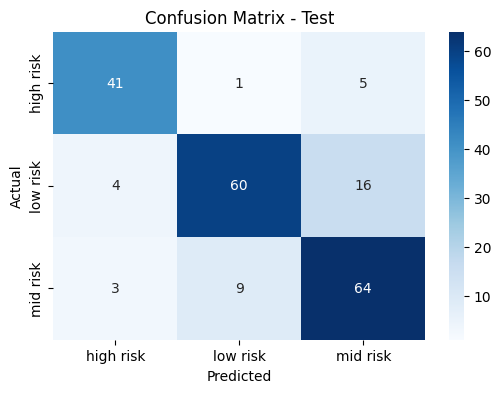

In [ ]:
# Балансировка классов
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Теперь все классы будут иметь одинаковое количество примеров (~336 шт. каждый)

# Обучение модели с class_weight='balanced'
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_res, y_res)  # обучаемся на сбалансированных данных

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Функция для оценки
def evaluate_model(y_true, y_pred, set_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n--- {set_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {set_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Оценка на train и test
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

Для медицинской задачи также важно увидеть, какие признаки следует выделять прежде всего при диагностике пациента, для этого графически выделим наиболее значимые признаки (показатели здоровья пациента).

**Визуализация важности признаков**

<ipython-input-9-89800b650c8d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


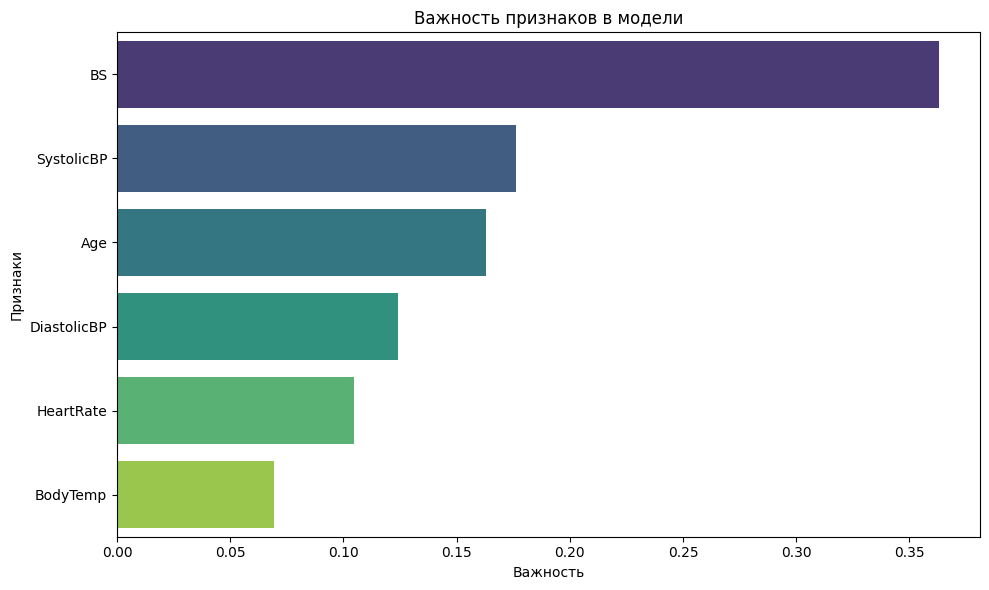

In [ ]:
# Получаем важность признаков
feature_importances = model.feature_importances_
features = X_train.columns

# Создаём DataFrame для удобства
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Важность признаков в модели')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

**Визуализация показывает**, что такие измерения, как уровень глюкозы в крови, систолическое давление и возраст - наиболее важны для нашей модели.
Остальные показатели наименее важны. Это может помочь в дальнейшей оптимизации: мы смоежм удалить нерелевантных признаков или собирать более точные данные для важнейших признаков (например, перепроверять их точность).

**Выводы:**
Предложенная нами модель RandomForestClassifier эффективна (81% точности), особенно если цель — выявление случаев высокого риска беременности.
По результатам трейна видим небольшое переобучение, но оно не критично.
Балансировка классов помогла точности модели, особенно по ключевому классу high risk.  Здесь важно не пропустить пациентов с высоким риском и "перебдеть".
Выявили наиболее важные признаки для модели: уровень глюкозы в крови, систолическое давление и возраст. К сбору данных параметров следует отнестить более внимательно.